# Spaceship titanic

# 1. Import Libraries/ Data Loading 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_style('whitegrid')
sns.color_palette("flare")
sns.set_palette(sns.color_palette("flare"))

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# 2. EDA (Exploratory Data Analysis) and Data Preprocessing


The goal of EDA is to understand the main characteristics of the data and identify any patterns, outliers, or other features of the data that are important to know before building a model or making predictions.

### Observations in Train Data
It's a first step in EDA. It is useful for understanding the main characteristics of the data and identifying any patterns, outliers, or other features of the data.

- There are total of 14 columns and 8693 rows in train data.
- Train data contains 119378 observation with 2324 missing values.
- All 12 feature columns have missing values in them with CryoSleep having highest missing values (217) 
- Transported is the target variable which is only available in the train dataset.

In [ ]:
train_data.head()

In [ ]:
print(f'Shape of train data: {train_data.shape}')

In [ ]:
print(f'Number of rows in train data: {train_data.shape[0]}')
print(f'Number of columns in train data: {train_data.shape[1]}')
print(f'Number of values in train data: {train_data.count().sum()}')
print(f'Number missing values in train data: {sum(train_data.isna().sum())}')

In [ ]:
print(train_data.isna().sum().sort_values(ascending = False))

The basic statistics for each variables which contain information on count, mean, standard deviation, minimum, 1st quartile, median, 3rd quartile and maximum.

In [ ]:
# Descriptive Statistics
train_data.describe()

The pandas-profiling library allows you to generate a profile report that allows you to obtain the types of all the columns and to access statistical details at the quantile level, descriptions, histograms, and the most frequent and exterm values.

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(train_data)

### Observations in Test Data
- There are total of 13 columns and 4277 rows in test data.
- Test data contains 54484 observation with 1117 missing values.
- All 12 feature columns have missing values in them with FoodCourt having highest missing values (106)

In [ ]:
test_data.head()

In [ ]:
print(f'Shape of test data: {test_data.shape}')

In [ ]:
print(f'Number of rows in test data: {test_data.shape[0]}')
print(f'Number of columns in test data: {test_data.shape[1]}')
print(f'Number of values in train data: {test_data.count().sum()}')
print(f'Number of rows with missing values  in test data: {sum(test_data.isna().sum())}')

In [ ]:
print((test_data.isna().sum().sort_values(ascending = False)))

In [ ]:
# statistics of test data 
test_data.describe()

### Visualization of data

In [ ]:
enc =LabelEncoder()
train_data['Transported'] = enc.fit_transform(train_data['Transported'])
sns.countplot(data=train_data,x=train_data.Transported)

<AxesSubplot: xlabel='Destination', ylabel='count'>

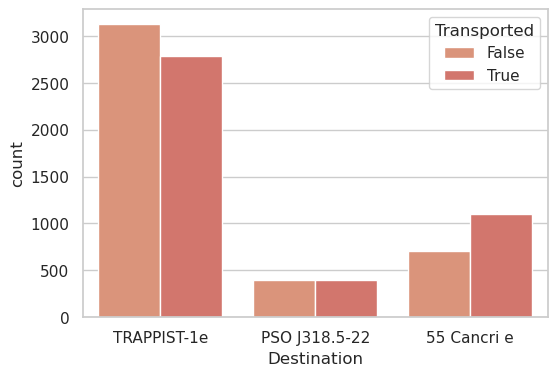

In [382]:
sns.countplot(data=train_data, x='Destination', hue='Transported')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

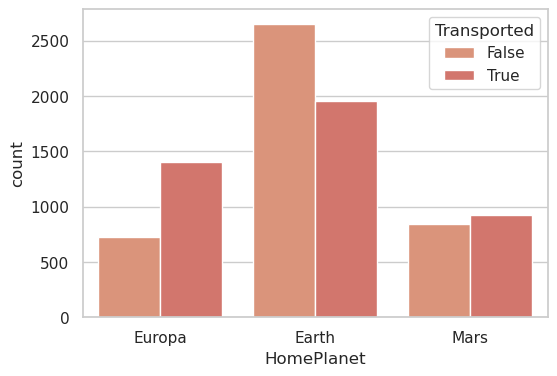

In [383]:
sns.countplot(data=train_data, x='HomePlanet', hue='Transported')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

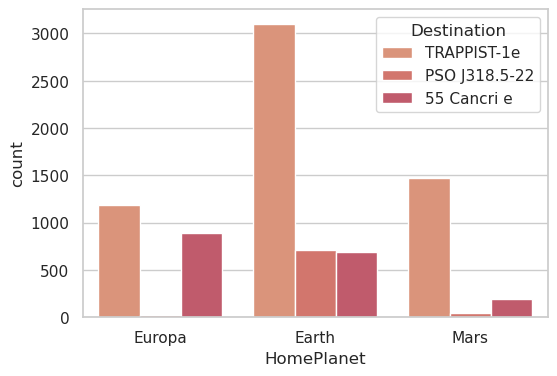

In [384]:
sns.countplot(data=train_data, x='HomePlanet', hue='Destination')

### Visualization of missing data

In [ ]:
# Using Missingno to Diagnose Data Sparsity

msno.matrix(train_data).set_title("Train set",fontsize=20)

In [ ]:
msno.matrix(test_data).set_title("Test set",fontsize=20)

### Correlation matrix

Darker colors indicate a stronger positive correlation, while lighter colors indicate a weaker positive correlation or a negative correlation.

In [ ]:
corr = train_data.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

In [ ]:
plt.figure(5, figsize=(25, 10))
corr = train_data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# 3. Feature Engineering
Feature engineering is the process of using domain knowledge to extract features from raw data that can be used to train machine learning models. It involves transforming raw data into a format that can be easily understood by the model, such as converting text to numerical values. The goal of feature engineering is to create a set of features that are most informative and relevant for the task at hand, which can improve the performance of the model.


In [3]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [4]:
train_data['Transported'].replace(False, 0, inplace=True)
train_data['Transported'].replace(True, 1, inplace=True)

In [5]:
train_data[['deck','num', 'side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['deck','num', 'side']] = test_data['Cabin'].str.split('/', expand=True)

train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)


train_data.drop('num', axis=1, inplace=True)
test_data.drop('num', axis=1, inplace=True)

In [6]:
col_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_data['total_spent'] = train_data[col_to_sum].sum(axis=1)
test_data['total_spent'] = test_data[col_to_sum].sum(axis=1)

<AxesSubplot: >

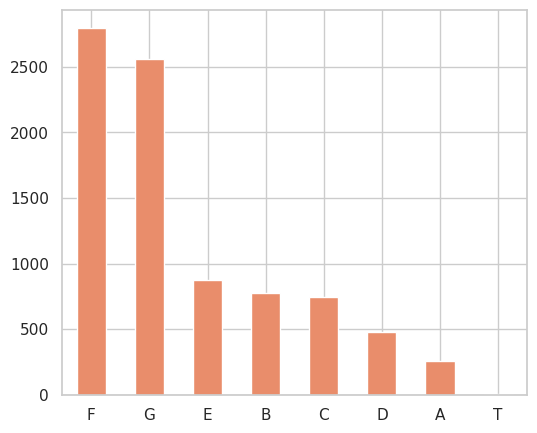

In [7]:
plt.figure(figsize=(6,5 ))
train_data['deck'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

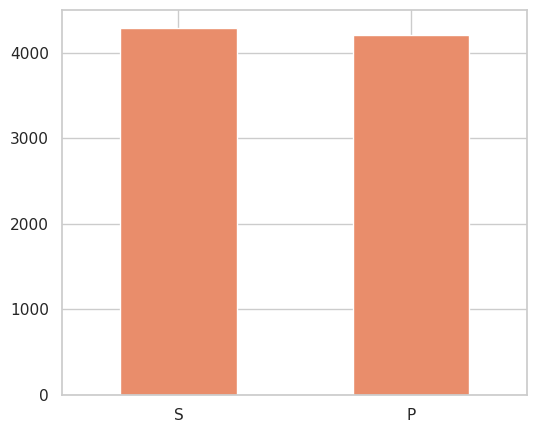

In [8]:
plt.figure(figsize=(6,5 ))
train_data['side'].value_counts().plot.bar(rot=0)

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

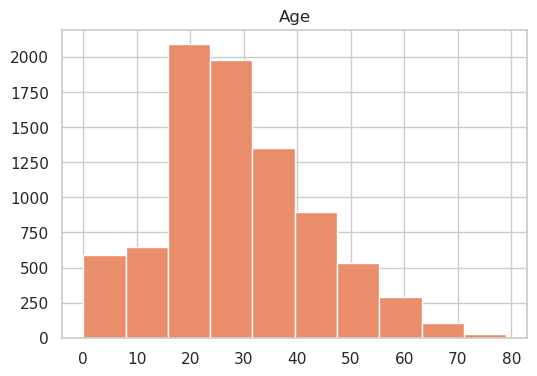

In [9]:
train_data.hist("Age")

In [10]:
train_data.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [11]:
# child : 0, teenager : 1, adult : 2, older : 3
labels=['child', 'teenager', 'adult', 'older']
bins = [0, 12, 21, 45, 80]
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager


<AxesSubplot: >

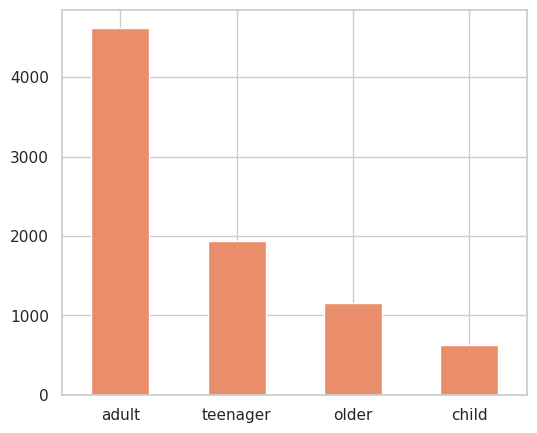

In [12]:
plt.figure(figsize=(6,5 ))
train_data['Age_Group'].value_counts().plot.bar(rot=0)

In [13]:
train_data = train_data.drop("Age", axis=1)
test_data = test_data.drop("Age", axis=1)

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager


In [14]:
train_data['Passenger_Group'] = train_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)
test_data['Passenger_Group'] = test_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)

train_data.set_index('PassengerId',inplace=True)
test_data.set_index('PassengerId',inplace=True)

# train_data = train_data.drop("PassengerId", axis = 1)
# test_data = test_data.drop("PassengerId", axis = 1)

/tmp/ipykernel_2497/414063447.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_data['Passenger_Group'] = train_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)
/tmp/ipykernel_2497/414063447.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_data['Passenger_Group'] = test_data['PassengerId'].str.split('_', 1, expand=True)[1].astype(int)


In [15]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,0,B,P,0.0,adult,1
0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,1,F,S,736.0,adult,1
0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,0,A,S,10383.0,older,1
0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,0,A,S,5176.0,adult,2
0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1091.0,teenager,1


### Outliers detection

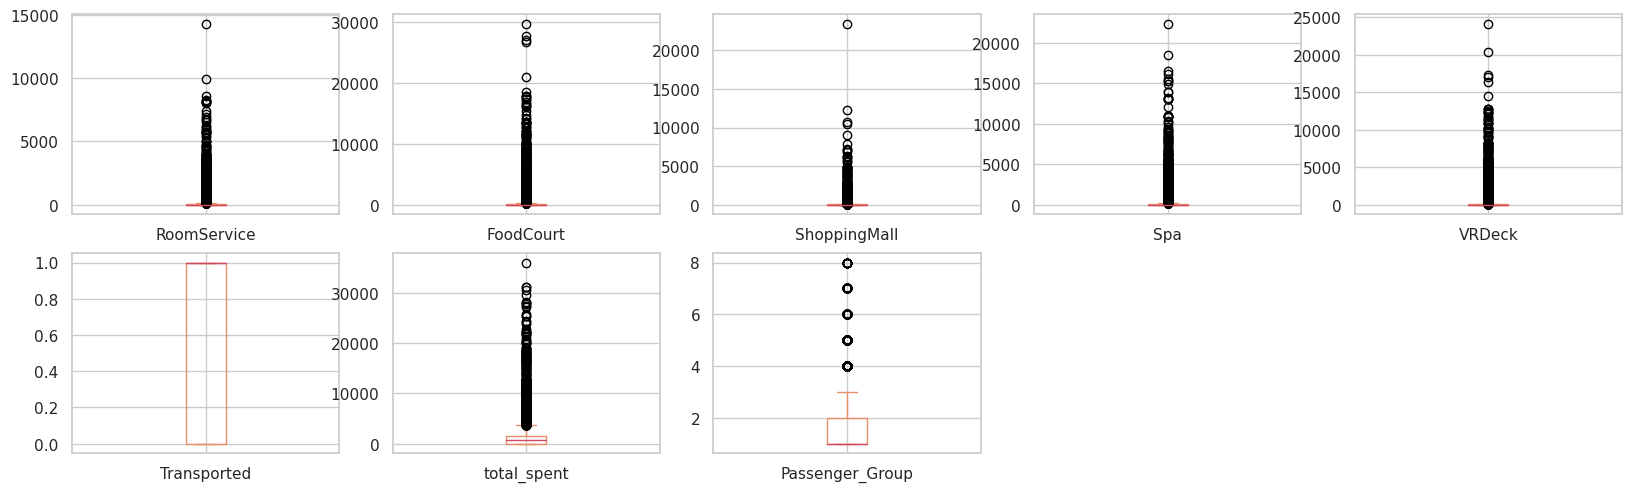

In [16]:
train_data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,15) )
plt.show()

<AxesSubplot: >

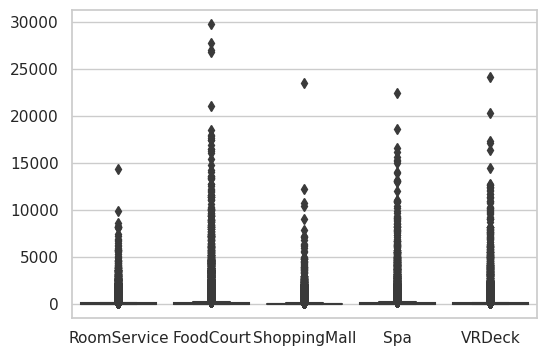

In [17]:
sns.boxplot(data=train_data[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

###  Imputing Missing Values


We are using Simple Imputer to fill the na values with the specified strategy.

For ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side', 'Age_Group'] we use the strategy most_frequent as it is categorical data.

For ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent'] we use the strategy median as it is numeric data.


In [18]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object' or train_data[col].dtype == 'category']
numeric_cols = [col for col in train_data.columns if train_data[col].dtype == 'float64']

print(f'Categorical cols -- {categorical_cols}')
print(f'Numeric cols -- {numeric_cols}')

Categorical cols -- ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'side', 'Age_Group']
Numeric cols -- ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent']


In [19]:
train_data[categorical_cols] = train_data[categorical_cols].astype('category')
test_data[categorical_cols] = test_data[categorical_cols].astype('category')

In [20]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()
data_for_encode = pd.concat([train_data, test_data])
data_for_encode[categorical_cols] = data_for_encode[categorical_cols].astype('category')
data_for_encode[categorical_cols] = oc.fit_transform(data_for_encode[categorical_cols])

del train_data, test_data

train_data = data_for_encode.iloc[:8693, :]
test_data = data_for_encode.iloc[8693: , :]

del data_for_encode

test_data.drop('Transported', inplace=True, axis=1)

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

ctc = ColumnTransformer([("imp", SimpleImputer(strategy='most_frequent'), categorical_cols)])
    
train_data[categorical_cols] = ctc.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = ctc.fit_transform(test_data[categorical_cols])

ctn = ColumnTransformer([("imp", SimpleImputer(strategy='median'), numeric_cols)])

train_data[numeric_cols] = ctn.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = ctn.fit_transform(test_data[numeric_cols])

train_data["Transported"].fillna(method='ffill', inplace = True)

In [22]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,,
0001_01,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
0002_01,0.0,0.0,2.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,5.0,1.0,736.0,0.0,1
0003_01,1.0,0.0,2.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,10383.0,2.0,1
0003_02,1.0,0.0,2.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,5176.0,0.0,2
0004_01,0.0,0.0,2.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,5.0,1.0,1091.0,3.0,1


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.fit_transform(test_data[numeric_cols])


In [27]:
train_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,,
0001_01,1.0,0.0,2.0,0.0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,1.0,0.0,-0.514066,0.0,1
0002_01,0.0,0.0,2.0,0.0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,5.0,1.0,-0.251479,0.0,1
0003_01,1.0,0.0,2.0,1.0,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.0,0.0,1.0,3.190333,2.0,1
0003_02,1.0,0.0,2.0,0.0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0.0,0.0,1.0,1.332604,0.0,2
0004_01,0.0,0.0,2.0,0.0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1.0,5.0,1.0,-0.124824,3.0,1


In [28]:
test_data.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,total_spent,Age_Group,Passenger_Group
PassengerId,,,,,,,,,,,,,,
0013_01,0.0,1.0,2.0,0.0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,6.0,1.0,-0.503425,0.0,1
0018_01,0.0,0.0,2.0,0.0,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,5.0,1.0,0.502231,3.0,1
0019_01,1.0,1.0,0.0,0.0,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,2.0,1.0,-0.503425,0.0,1
0021_01,1.0,0.0,2.0,0.0,-0.357339,4.121518,-0.312173,-0.104002,0.226648,2.0,1.0,2.130740,0.0,1
0023_01,0.0,0.0,2.0,0.0,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,5.0,1.0,-0.274383,3.0,1


# Modeling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score


In [30]:
X = train_data.drop('Transported',axis=1)
y = train_data['Transported']

X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'deck', 'side',
       'total_spent', 'Age_Group', 'Passenger_Group'],
      dtype='object')

In [31]:
X_test = test_data

### LogisticRegression

In [91]:
model_Log = LogisticRegression(max_iter=10000)
model_Log.fit(X,y)
model_Log.score(X,y)

0.7845392844817669

In [92]:
y_pred_log= model_Log.predict(X_test)

### SVM

In [71]:
model_svc = SVC(random_state = 42)
model_svc.fit(X,y)
model_svc.score(X,y)

0.801104336822731

In [72]:
y_pred_svc = model_svc.predict(X_test)

In [73]:
sub=pd.DataFrame({'Transported':y_pred_svc.astype(bool)},index=X_test.index)
sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


### Random Forest

In [59]:
model_forest = RandomForestClassifier()
model_forest.fit(X,y)
model_forest.score(X,y)

0.929598527550903

In [60]:
y_pred_forest = model_forest.predict(X_test)

In [65]:
sub=pd.DataFrame({'Transported':y_pred_forest.astype(bool)},index=X_test.index)
sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


In [67]:
# fine tunnig random forest 
forest_params = [{'n_estimators':[500],
                'min_samples_leaf':[4]}]

forest_grid = GridSearchCV(estimator=model_forest, param_grid=forest_params, cv=5)
forest_grid.fit(X, y)
forest_grid.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [69]:
model_forest_final = forest_grid.best_estimator_
y_pred_forest2 = model_forest_final.predict(X_test)

In [70]:
fr_score = cross_val_score(model_forest_final, X, y, cv=5)
fr_score.mean()

0.7919035383349955

### K-Neighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,15)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X,y)
knn_gscv.best_params_

{'n_neighbors': 11}

In [37]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X,y)
model_knn.score(X,y)

0.8034050385367537

In [38]:
y_pred_knn = model_knn.predict(X_test)

### Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbr = GradientBoostingClassifier(random_state = 1)
  
# Fit to training set
model_gbr.fit(X, y)
model_gbr.score(X,y)

0.8142183365926607

In [41]:
y_pred_gbr = model_gbr.predict(X_test)

### Tuning the Gradient Boostinf classifier

In [57]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]
}
cv = RandomizedSearchCV(gbc, parameters, n_iter=27, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
cv.fit(X,y)
cv.best_params_

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [52]:
model2_gbc = GradientBoostingClassifier(n_estimators=100,max_depth=5,learning_rate=0.1) #best params from gscv

model2_gbc.fit(X,y)
model2_gbc.score(X,y)

0.8413666168181295

In [53]:
y_pred_gbc = model2_gbc.predict(X_test)

### Extreme Gradient Boosting

In [43]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X,y)
model_xgb.score(X,y)

0.8900264580697113

In [44]:
y_pred_xgb = model_xgb.predict(X_test)

### CatBoost

In [46]:
from catboost import CatBoostClassifier

model_cat=CatBoostClassifier(iterations=3000,
                         eval_metric='Accuracy',
                        verbose=0)


In [47]:
model_cat.fit(X,y)

In [48]:
from sklearn.metrics import accuracy_score
pred = model_cat.predict(X)
print(accuracy_score(y.values,pred))

0.8571264235591856


In [58]:
y_pred_cat = model_cat.predict(X_test)

### AdaBoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [96]:
ada_boost_model.fit(X, y)

AdaBoostClassifier(random_state=42)

In [97]:
ada_boost_model.score(X,y)

0.7940871965949614

In [98]:
y_pred_adaboost = ada_boost_model.predict(X_test)

In [99]:
sub=pd.DataFrame({'Transported':y_pred_adaboost.astype(bool)},index=X_test.index)
sub.head()

,Transported
PassengerId,
2983_01,False
2257_02,True
3138_01,False
7159_01,True
3904_01,False


### Fine tune AdaBoost Classifier

### Lazy Classifier

In [81]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from IPython.display import clear_output

In [78]:
X_train , X_test , y_train , y_test = train_test_split(X, 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

In [82]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [83]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.09
XGBClassifier,0.79,0.79,0.79,0.79,0.17
SVC,0.78,0.78,0.78,0.78,1.16
NuSVC,0.78,0.78,0.78,0.78,1.44
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.21
RandomForestClassifier,0.78,0.78,0.78,0.78,0.48
CalibratedClassifierCV,0.77,0.77,0.77,0.77,1.38
LinearSVC,0.77,0.77,0.77,0.77,0.37
LogisticRegression,0.77,0.77,0.77,0.77,0.03
